# Clean and Analyze Employee Exit Surveys
In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey and the survey for the DETE in the repository.

We try to find answers to the following questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


## *Step 1*: Read the datasets


In [1]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')


In [2]:
print(dete_survey.info(), '\n')
print(dete_survey.head(), '\n')
print(dete_survey.isnull().sum(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
print(tafe_survey.info(), '\n')
print(tafe_survey.head(), '\n')
print(tafe_survey.isnull().sum(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

We can first make the following observations:
- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

## *Step 2*: Data Cleaning
### Identify Missing Values and Drop Unnecessary Columns
We replace the Not Stated values with NaN, and drop some columns that we do not need for our analysis.

In [4]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)


In [5]:
print(dete_survey_updated.columns,'\n')
print(tafe_survey_updated.columns,'\n')

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object') 

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fa

### Rename Columns
Each dataframe contains many of the same columns, but the column names are different. Because we eventually want to combine them, we will have to standardize the column names.

In [6]:
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.lower()
                               .str.strip()
                               .str.replace('\s+', '_'))
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [7]:
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Filter the data
Since we are interested in why employees are resigning, we would only focus on the separation type as 'Resignation'.

In [8]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Note that dete_survey_updated dataframe contains multiple separation types with 'Resignation'. We have to take all of them in consideration.

In [9]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [10]:
pattern = r'Resignation'
resign_dete = dete_survey_updated['separationtype'].str.contains(pattern)
dete_resignation = dete_survey_updated[resign_dete].copy()
resign_tafe = tafe_survey_updated['separationtype'].str.contains(pattern, na=False)
tafe_resignation = tafe_survey_updated[resign_tafe].copy()

 ### Verify the data
 Before we start cleaning and manipulating the rest of our data, let us verify that the data does not contain any major inconsistencies (to the best of our knowledge).
 
In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense. 

- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [11]:
dete_resignation['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

We extract the year from the given data.

In [12]:
pattern = r'(?P<Years>[2][0][0-1][0-9])'
year = dete_resignation['cease_date'].str.extract(pattern)
dete_resignation['cease_date'] = year['Years'].astype(float)
dete_resignation['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [13]:
dete_resignation['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [14]:
tafe_resignation['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

We make a boxplot of cease_date values in both datasets.


Text(0.5, 1.0, 'dete_resignation')

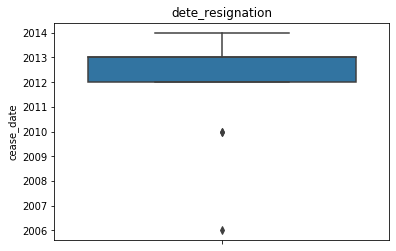

In [15]:
import seaborn as sns
ax1 = sns.boxplot(y=dete_resignation['cease_date'])
ax1.set_title('dete_resignation')

Text(0.5, 1.0, 'tafe_resignation')

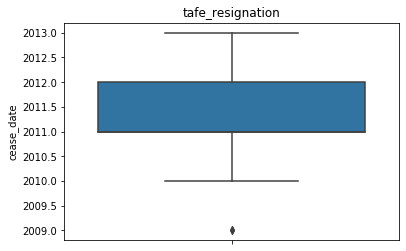

In [16]:
ax2 = sns.boxplot(y=tafe_resignation['cease_date'])
ax2.set_title('tafe_resignation')

We observe that the years do not completely align. However, since we are not concerned with analyzing the results by year, we will leave them as it is.

### Create new column
The tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

In [17]:
dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']

In [18]:
dete_resignation['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

In [19]:
tafe_resignation['institute_service']

3       NaN
4       3-4
5      7-10
6       3-4
7       3-4
       ... 
696     5-6
697     1-2
698     NaN
699     5-6
701     3-4
Name: institute_service, Length: 340, dtype: object

We notice that the values are represted as a range. We modify these later after we combine the two datasets.

### Identify Dissatisfied Employees
We identify any employees who resigned because they were dissatisfied.
To do so, we consider these columns-
1. tafe_survey_updated:
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction
2. dete_survey_updated:
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload
    
If the employee indicated any of these factors caused them to resign, we will mark them as dissatisfied in a new column.

In [20]:
tafe_col = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
print(tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts())


-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We must first map these values to True/False

In [21]:
def update_vals(x):
    if pd.isnull(x):
        return np.nan
    elif x == '-':
        return False
    else:
        return True

tafe_resignation['dissatisfied'] = tafe_resignation[tafe_col].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignation['dissatisfied'].value_counts(dropna=False)

False    241
True      91
True       8
Name: dissatisfied, dtype: int64

In [22]:
dete_col = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']
for col in dete_col:
    print(dete_resignation[col].value_counts(),'\n')

False    270
True      41
Name: job_dissatisfaction, dtype: int64 

False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64 

False    305
True       6
Name: physical_work_environment, dtype: int64 

False    278
True      33
Name: lack_of_recognition, dtype: int64 

False    297
True      14
Name: lack_of_job_security, dtype: int64 

False    293
True      18
Name: work_location, dtype: int64 

False    288
True      23
Name: employment_conditions, dtype: int64 

False    243
True      68
Name: work_life_balance, dtype: int64 

False    284
True      27
Name: workload, dtype: int64 



In [23]:
dete_resignation['dissatisfied'] = dete_resignation[dete_col].any(axis=1, skipna=False)


In [24]:
tafe_resignation_up = tafe_resignation.copy()
dete_resignation_up = dete_resignation.copy()


### Combine the datasets
Our end goal is to aggregate the data according to the institute_service column.

In [25]:
dete_resignation_up['institute'] = 'DETE'
tafe_resignation_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignation_up,tafe_resignation_up],ignore_index=True)
combined_updated = combined.dropna(thresh=500, axis=1).copy()

### Clean the Service column
As observed earlier this column contains values in different forms. We must clean the data so a uniform type is followed.

In [26]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


In [27]:
combined_updated['institute_service'] = (combined_updated['institute_service']
                                         .astype(str)
                                         .str.extract(r'(\d+)')
                                         .astype(float))
combined_updated['institute_service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

Now we map the service to the following definitions:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

These are saved in a new column named service_cat.

In [28]:
def map_values(x):
    if pd.isnull(x):
        return np.nan
    elif x<3:
        return 'New'
    elif x<7:
        return 'Experienced'
    elif x<11:
        return 'Established'
    else:
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service'].apply(map_values)

In [29]:
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

We check the age column to identify if it needs to be cleaned. We need this for the second part of our analysis.

In [30]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
21-25            29
56 or older      29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

The ages are represented as ranges. We extract digits from these and club them in the following categories:
- 25 or younger
- 26 - 35
- 36 - 45
- 46 - 55
- 56 or older

These are saved in a new column age_cat

In [31]:
combined_updated['age'] = (combined_updated['age']
                                         .astype(str)
                                         .str.extract(r'(\d+)')
                                         .astype(float))
combined_updated['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [32]:
def map_values(x):
    if pd.isnull(x):
        return np.nan
    elif x<26:
        return '25 or younger'
    elif x<36:
        return '26-35'
    elif x<46:
        return '36-45'
    elif x<56:
        return '46-55'
    else:
        return '56 or older'
    
combined_updated['age_cat'] = combined_updated['age'].apply(map_values)

In [33]:
combined_updated['age_cat'].value_counts()

36-45            166
46-55            152
26-35            128
56 or older       78
25 or younger     72
Name: age_cat, dtype: int64

## *Step 3*: Analysis
### Based on Service
We want to identify dissatisfied resignations based on Experience and Age.
Let's start with Experience (or service).

In [34]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
True       8
Name: dissatisfied, dtype: int64

In [35]:
combined_updated['dissatisfied'].isnull().sum()

8

We replace the null values with the most frequent value, False.

In [36]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [37]:
service_pvt = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

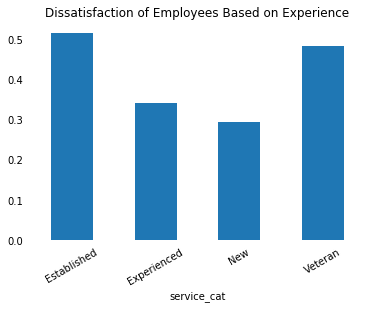

In [38]:
%matplotlib inline
ax1 = service_pvt.plot(kind='bar', rot=30)
ax1.tick_params(bottom=False, left=False)
for key,spine in ax1.spines.items():
    spine.set_visible(False)
ax1.set_title('Dissatisfaction of Employees Based on Experience')
ax1.get_legend().remove()

From the analysis above, we can assume that employees with 7 or more years of experience are more likely to resign due to some kind of dissatisfaction with the job.

### Based on Age
Now, we perform the same analysis for age.

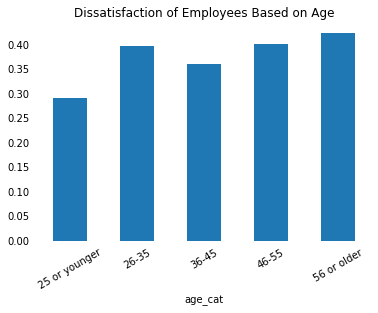

In [39]:
age_pvt = combined_updated.pivot_table(index='age_cat', values='dissatisfied')
ax2 = age_pvt.plot(kind='bar', rot=30)
ax2.tick_params(bottom=False, left=False)
for key,spine in ax2.spines.items():
    spine.set_visible(False)
ax2.set_title('Dissatisfaction of Employees Based on Age')
ax2.get_legend().remove()

There is no obvious pattern here. We can only draw that employees aged '25 or younger' are less likely to resign based on dissatisfaction. This might be because they are at the beginning of their career. Similarly those nearing their retirement age are more likely to resign.